In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [117]:
uo = 1.
h = 60; g = 10
c = np.sqrt(g*h)
print c
om = 2*np.pi/(12.4*3600.)
r = 0.0008
L = 220e3
print om/c, c/om

24.4948974278
5.74619099535e-06 174028.326035


In [118]:
kp = np.sqrt(0.5*(om**2/c**2+np.sqrt(om**4/c**4+r**2*om**2/c**4)))
km = -np.sqrt(0.5*(om**2/c**2+np.sqrt(om**4/c**4+r**2*om**2/c**4)))
lp = -r*om/(2*kp*c**2)
lm = -r*om/(2*km*c**2)
print kp, km, lp, lm

1.05728673792e-05 -1.05728673792e-05 -8.87506696674e-06 8.87506696674e-06


Four waves:
- u1 exp(lp x) cos(kp x - om t)
- u2 exp(lp x) sin(kp x - om t)
- u3 exp(lm x) cos(km x - om t)
- u4 exp(lm x) sin(km x - om t)

Sines:
- u2 + u4 = 0
- u1 exp(lp L) cos(kp L) + u2 exp(lp L) sin(kp L) + u3 exp (lm L) cos(km L) - u4 exp (lm L) sin(km L) = 0


Cosines:
- u1 + u3 = uo
- u1 exp(lp L) sin(kp L) + + u2 exp(lp L) cos(kp L) - u3 exp (lm L) sin(km L) + u4 exp (lm L) cos(km L) = 0

In [119]:
Matrix = [[0,1,0,1],
          [np.exp(lp*L)*np.cos(kp*L), np.exp(lp*L)*np.sin(kp*L), 
           np.exp(lm*L)*np.cos(km*L), np.exp(lm*L)*np.sin(km*L)],
          [1,0,1,0],
          [np.exp(lp*L)*np.sin(kp*L), np.exp(lp*L)*np.cos(kp*L), 
           np.exp(lm*L)*np.sin(km*L), np.exp(lm*L)*np.cos(km*L)],]
print Matrix, -np.exp(lm*L)*np.sin(km*L)
rhs = [0,0,uo,0]

[[0, 1, 0, 1], [-0.097278167160865792, 0.10333111454593606, -4.8300110891837482, -5.1305492658929053], [1, 0, 1, 0], [0.10333111454593606, -0.097278167160865792, -5.1305492658929053, -4.8300110891837482]] 5.13054926589


In [120]:
xu = np.linalg.solve(Matrix, rhs)
print xu
u1, u2, u3, u4 = xu

[ 0.79954638  0.19984629  0.20045362 -0.19984629]


In [121]:
xx = np.arange(0,L,L/25.)
tt = np.arange(0,2*np.pi,np.pi/10.)
x,t = np.meshgrid(xx,tt)

In [122]:
u = (u1 * np.exp(lp*x) * np.cos(kp*x-t) + u2 * np.exp(lp*x) * np.sin(kp*x-t) 
     + u3 * np.exp(lm*x) * np.cos(km*x-t) + u4 * np.exp(lm*x) * np.sin(km*x-t) )

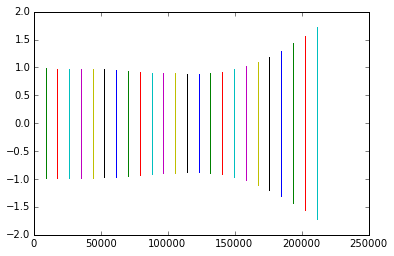

In [123]:
plt.plot(x,u);

In [124]:
eta = (u1 * lp * np.exp(lp*x) * np.cos(kp*x-t) - u1 * kp * np.exp(lp*x) * np.sin(kp*x-t) 
     + u2 * lp * np.exp(lp*x) * np.sin(kp*x-t) + u2 * kp * np.exp(lp*x) * np.cos(kp*x-t) 
     + u3 * lm * np.exp(lm*x) * np.cos(km*x-t) - u3 * km * np.exp(lm*x) * np.sin(km*x-t) 
     + u4 * lm * np.exp(lm*x) * np.sin(km*x-t) + u4 * km * np.exp(lm*x) * np.cos(km*x-t))/om
amp = np.sqrt((u1 * lp * np.exp(lp*x)) **2 + (u1 * kp * np.exp(lp*x))**2 
     + (u2 * lp * np.exp(lp*x))**2 + (u2 * kp * np.exp(lp*x))** 2
     + (u3 * lm * np.exp(lm*x))**2 + (u3 * km * np.exp(lm*x))**2
     + (u4 * lm * np.exp(lm*x))**2 + (u4 * km * np.exp(lm*x))**2)/om

(25,) (20, 25)
0.0008 220000.0 60


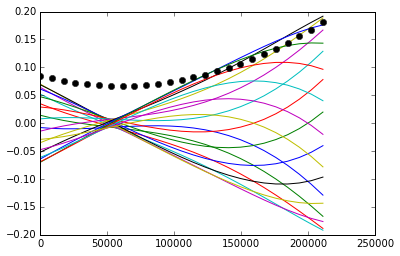

In [125]:
print eta[0,:].shape, x.shape
for i,it in enumerate(tt):
    plt.plot(x[i,:],eta[i,:]);
plt.plot(x[1,:],amp[1,:],'o')
print r, L, h

In [114]:
print x.shape, t.shape
eta = (u1 * lp * np.exp(lp*x) * np.cos(kp*x-t) - u1 * kp * np.exp(lp*x) * np.sin(kp*x-t) 
     + u2 * lp * np.exp(lp*x) * np.sin(kp*x-t) + u2 * kp * np.exp(lp*x) * np.cos(kp*x-t) 
     + u3 * lm * np.exp(lm*x) * np.cos(km*x-t) - u3 * km * np.exp(lm*x) * np.sin(km*x-t) 
     + u4 * lm * np.exp(lm*x) * np.sin(km*x-t) + u4 * km * np.exp(lm*x) * np.cos(km*x-t))/om
eta1 = (u1 * lp * np.exp(lp*x) * np.cos(kp*x-t) - u1 * kp * np.exp(lp*x) * np.sin(kp*x-t) 
     + u2 * lp * np.exp(lp*x) * np.sin(kp*x-t) + u2 * kp * np.exp(lp*x) * np.cos(kp*x-t) )/om
eta2 = (u3 * lm * np.exp(lm*x) * np.cos(km*x-t) - u3 * km * np.exp(lm*x) * np.sin(km*x-t) 
     + u4 * lm * np.exp(lm*x) * np.sin(km*x-t) + u4 * km * np.exp(lm*x) * np.cos(km*x-t))/om

(20, 25) (20, 25)


(25,) (20, 25)


(-0.06, 0.06)

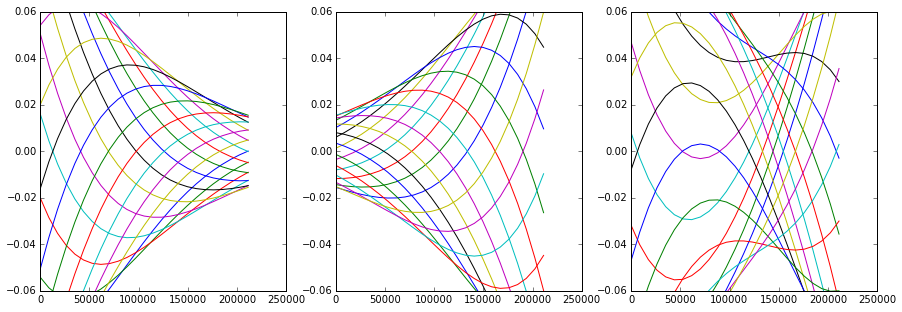

In [115]:
print eta1[0,:].shape, x.shape
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i,it in enumerate(tt):
    axs[0].plot(x[i,:],eta1[i,:])
    axs[1].plot(x[i,:],eta2[i,:])
    axs[2].plot(x[i,:],eta[i,:])
axs[0].set_ylim((-0.06,0.06))
axs[1].set_ylim((-0.06,0.06))
axs[2].set_ylim((-0.06,0.06))

(25,) (20, 25)
0.00075 220000.0 60


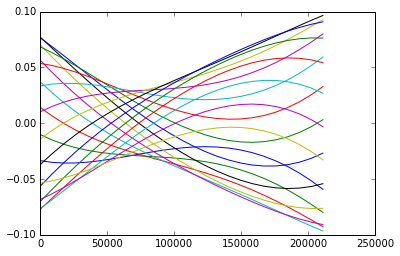

In [24]:
print eta[0,:].shape, x.shape
for i,t in enumerate(tt):
    plt.plot(x[i,:],eta[i,:]);
print r, L, h

(25,) (20, 25)
0.0003 220000.0 60


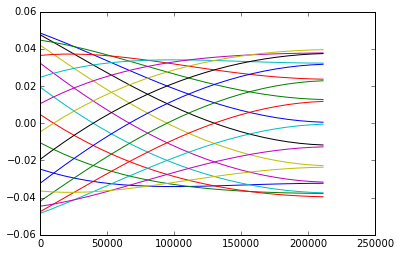

In [95]:
print eta[0,:].shape, x.shape
for i,t in enumerate(tt):
    plt.plot(x[i,:],eta[i,:]);
print r, L, h

(25,) (20, 25)
0.0009 220000.0 60


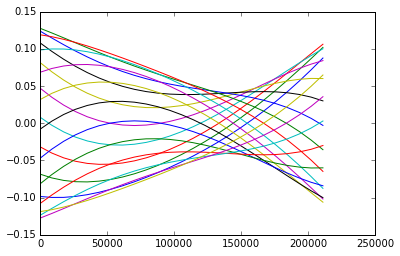

In [116]:
print eta[0,:].shape, x.shape
for i,t in enumerate(tt):
    plt.plot(x[i,:],eta[i,:]);
print r, L, h

(25,) (20, 25)
0.00075


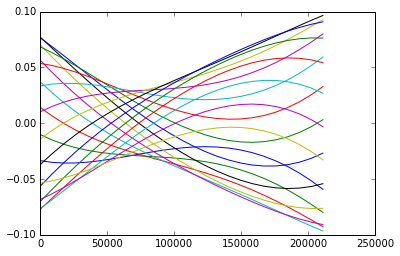

In [14]:
print eta[0,:].shape, x.shape
for i,t in enumerate(tt):
    plt.plot(x[i,:],eta[i,:]);
print r

In [15]:
plt.plot(x*20/15.,-eta_001, label="r = 0.001, L = 200")
plt.plot(x*20/15.,-eta_002, label="r = 0.002, L = 200")
plt.plot(x*20/15.,-eta_003, label="r = 0.003, L = 200")
plt.plot(x,-eta_003_150, label="r = 0.003, L = 150")
plt.plot(x,-eta_0005_150, label="r = 0.0005, L = 150")
plt.legend(loc="upper right")

NameError: name 'eta_001' is not defined